In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop("Unnamed: 3",inplace=True,axis=1)
df.drop("Unnamed: 4",inplace=True,axis=1)

df.head()

,v1,v2,Unnamed: 2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,U dun say so early hor... U c already then say...,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN


<h3>Cleaning and Preparing text</h3>
<ul>
    <li>Cleaning links</li>
    <li>Cleaning digits except alphabetical and numeric characters</li>
    <li>Lowering</li>
    <li>Tokenising</li>
    <li>Lemmatizing and Removing Stop words</li>
    <li>Bag of words</li>
</ul>

<h3>Cleaning links</h3>
<p>There are links in the mail such as: <a>https://google.com.tr</a>. If we don't remove them they can cause problems.</p>
<p>To clean the following links, we can use Regex(regular) expression.A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern. Regular expressions are widely used in UNIX world. </p>

In [5]:
x = df["v2"]
x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]

print(x_clnd_link[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


<h3>Cleaning digits except alphabetical and numeric characters</h3>
<p>As you can see from the text above, there are a lot of digits such as <b>*</b> and <b>:</b> They don't have a meaning, so we should remove them from the texts.

In order to clean unrelevant digits we'll use regex again.</p>

In [6]:
pattern = "[^a-zA-Z0-9]"

<p>-This helps to remove special characters</p>

In [7]:
#This means to replace all the characters following the pattern
x_cleaned = [re.sub(pattern, " ",text) for text in x_clnd_link]

print(x_cleaned[0])

Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   


<p><b>Now let's lower the texts, I won't add a section for it because it is a familiar process from the vanilla python.

</b></p>

In [10]:
x_lowered = [text.lower() for text in x_cleaned]

print(x_lowered[0])

go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   


<h3>Tokeninzing</h3>
<p>In order to create a feature that shows whether the text includes the word or not, we need to split words into lists, we can do this using pythonString.split() but there is a better function to do this in NLTK.

Let's tokenize the texts.</p>

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
x_tokenized = [nltk.word_tokenize(text) for text in x_lowered]

print(x_tokenized[0])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


<p>- Each sentence turned into a list that contains words.</p>

<h3>Lemmatizing and Removing Stopwords</h3>
<p>In natural languages, words can get additional so each word can have a lot of versions, sometimes these additionals may give tips to us but in filtering spams, we don't need them.There are two ways to remove additionals: <b>Stemmers and Lemmatizers</b> </p>

<h3>Stemmers</h3>
<p>Stemmers are rule based weak tools, they remove additionals using rules but in natural languages everything does not follow the rules. Also It cant change tenses, for instance lemmatizers convert learnt into learn, stemmers don't touch them. Although stemmers are weak they are fast and although so many natural language do not have lemmatizers most of them have stemmers.</p>

<h3>Lemmatizers</h3>
<p>Lemmatizers uses dictionaries to remove additionals and change tenses. They work good but developing a lemmatizer is hard and needs a lot of resource, so they are rare. Also lemmatizers use dictionaries, and that causes lemmatizers being slow.

In this kernel we'll use NLTK's WordNet Lemmatizer. WordNet is a big dictionary.</p>


In [13]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


<p>- Now, we can easily use lemmatizer</p>

In [14]:
words = ["pets","bats","cats","removed","beers","went","stopped","studied"]
for word in words:
    print(lemma.lemmatize(word), end=" ")

pet bat cat removed beer went stopped studied 

<p>- We can now lemmatize our tokenized text</p>

In [15]:
x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]

print(x_lemmatized[0])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


<h3>Removing Stopwords</h3>
<p>In natural languages there are words that not have a special meaning such as <b>will</b>, it is always a tense and such as <b>and,or</b>

In order to win from time and improve the model we should remove them. There are several ways to remove them but in this kernel we'll use stopwords corpora of NLTK. There are stopwords of 11 natural language in there.</p>

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]

print(x_prepared[0])

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']


<p>Let's see the unique words of our dataset</p>

<h3>Bag of words</h3>
<p>And we came to the final process of this section: Bag of Words. Bag of Words is an easy approach to make sense of texts.</p>

In [18]:
vectorizer = CountVectorizer(max_features=20000)
x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()

In [19]:
x.shape

(5572, 7935)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,np.asarray(df["v1"]),random_state=42,test_size=0.2)
x_train.shape

(4457, 7935)

<h3>Naive Bayes Model</h3>

In [21]:
start_time = time.time()
NB = GaussianNB()
NB.fit(x_train,y_train)
end_time = time.time()

print(round(end_time-start_time,2))

0.64


In [22]:
NB.score(x_test,y_test)

0.8887892376681614

In [23]:
import itertools

Confusion matrix, without normalization
[[851 114]
 [ 10 140]]


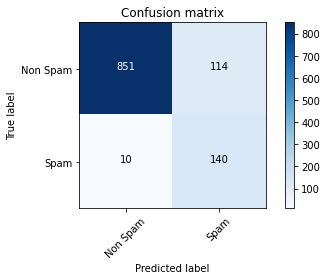

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = NB.predict(x_test)

conf = confusion_matrix(y_pred=y_pred,y_true=y_test)
import seaborn
import matplotlib.pyplot as plt

def plot_confusion_matrix(conf, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(conf)

    plt.imshow(conf, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf.max() / 2.
    for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
        plt.text(j, i, format(conf[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(conf, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')

<h3>How to Save and Deploy The Model</h3>
<p>In this extra section I will show you how to save and deploy your sklearn model using pickle.

Pickle is the easiest way of saving a python object.</p>

In [25]:
import pickle

with open("model.pckl", mode ="wb") as F:
    pickle.dump(NB,F)
    
with open("vectorizer.pckl", mode="wb") as F:
    pickle.dump(vectorizer, F)

In [26]:
def predict_mail(mail):
    
    model = pickle.load(open("model.pckl",mode="rb"))
    vectorizer = pickle.load(open("vectorizer.pckl",mode="rb"))
    
    lemma = WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english')
    
    mail = re.sub(r"http\S+", "", mail)
    mail = re.sub("[^a-zA-Z0-9]"," ",mail)
    mail = mail.lower()
    mail = nltk.word_tokenize(mail)
    mail = [lemma.lemmatize(word) for word in mail]
    mail = [word for word in mail if word not in stopwords]
    mail = " ".join(mail)
    
    vector = vectorizer.transform([mail])
    decision = model.predict(vector.toarray())
    
    return decision[0]

In [27]:
predict_mail("Flash sale: you can buy a laptop just with one dollar")

'ham'

## WORDCLOUD

In [28]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [29]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

In [30]:
spam_train_index = [i for i,o in enumerate(y_train) if o == "spam"]
non_spam_train_index = [i for i,o in enumerate(y_train) if o == "ham"]

In [31]:
spam_email = np.array(x_prepared)[spam_train_index]
non_spam_email = np.array(x_prepared)[non_spam_train_index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


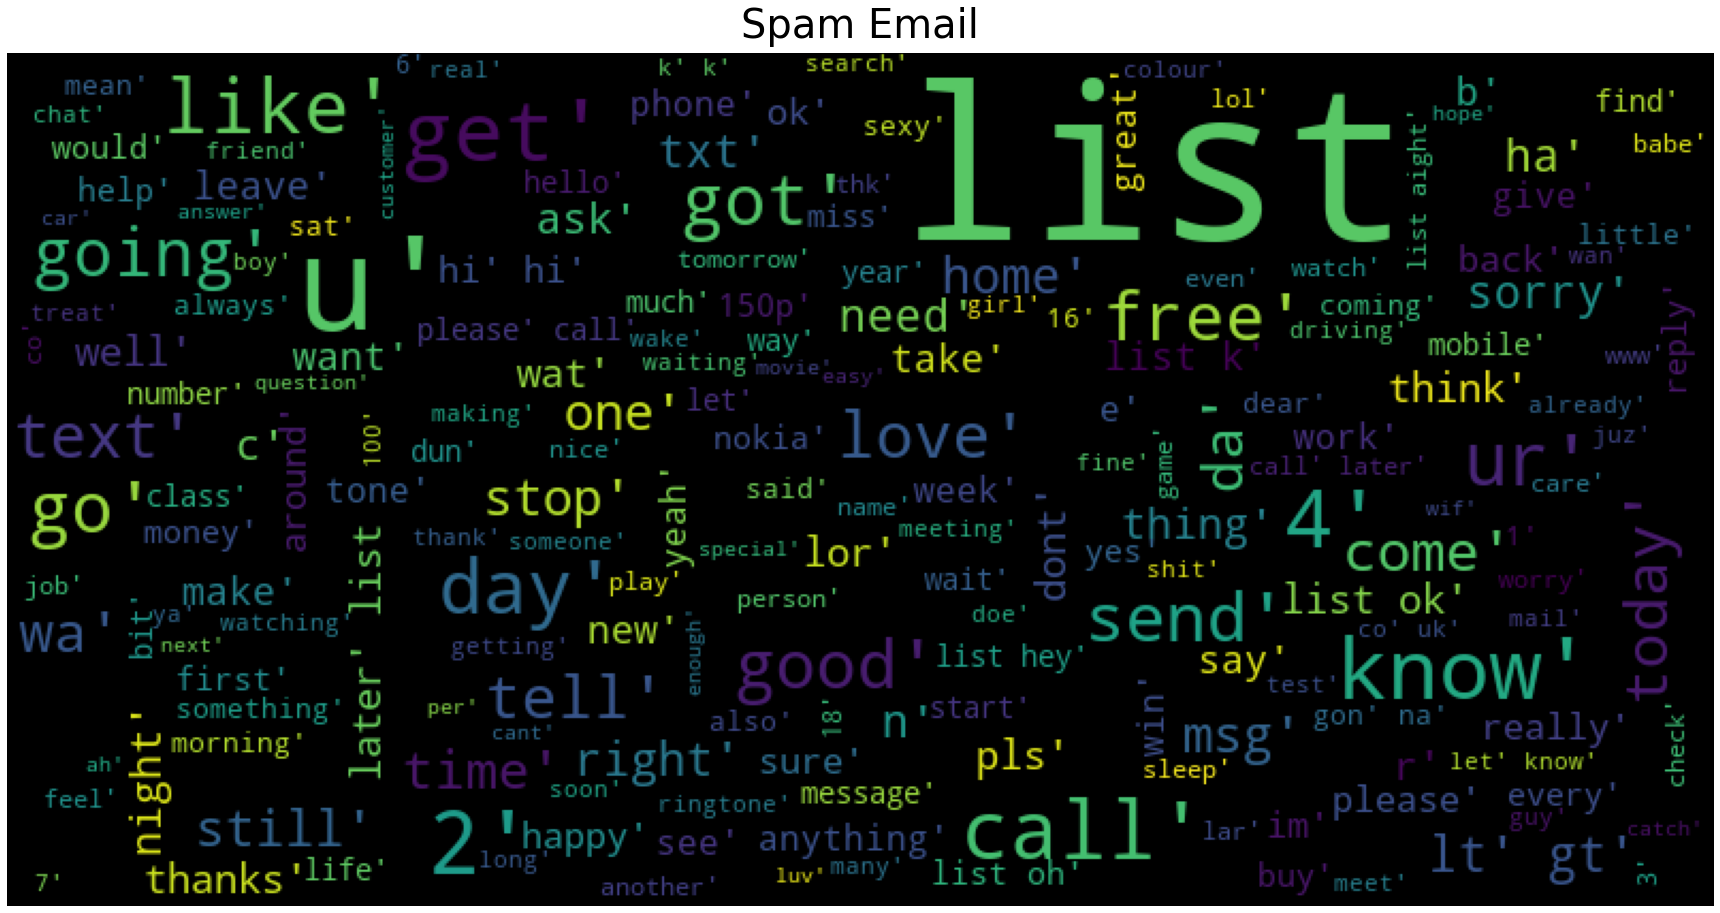

In [32]:
plot_wordcloud(spam_email,title = 'Spam Email')

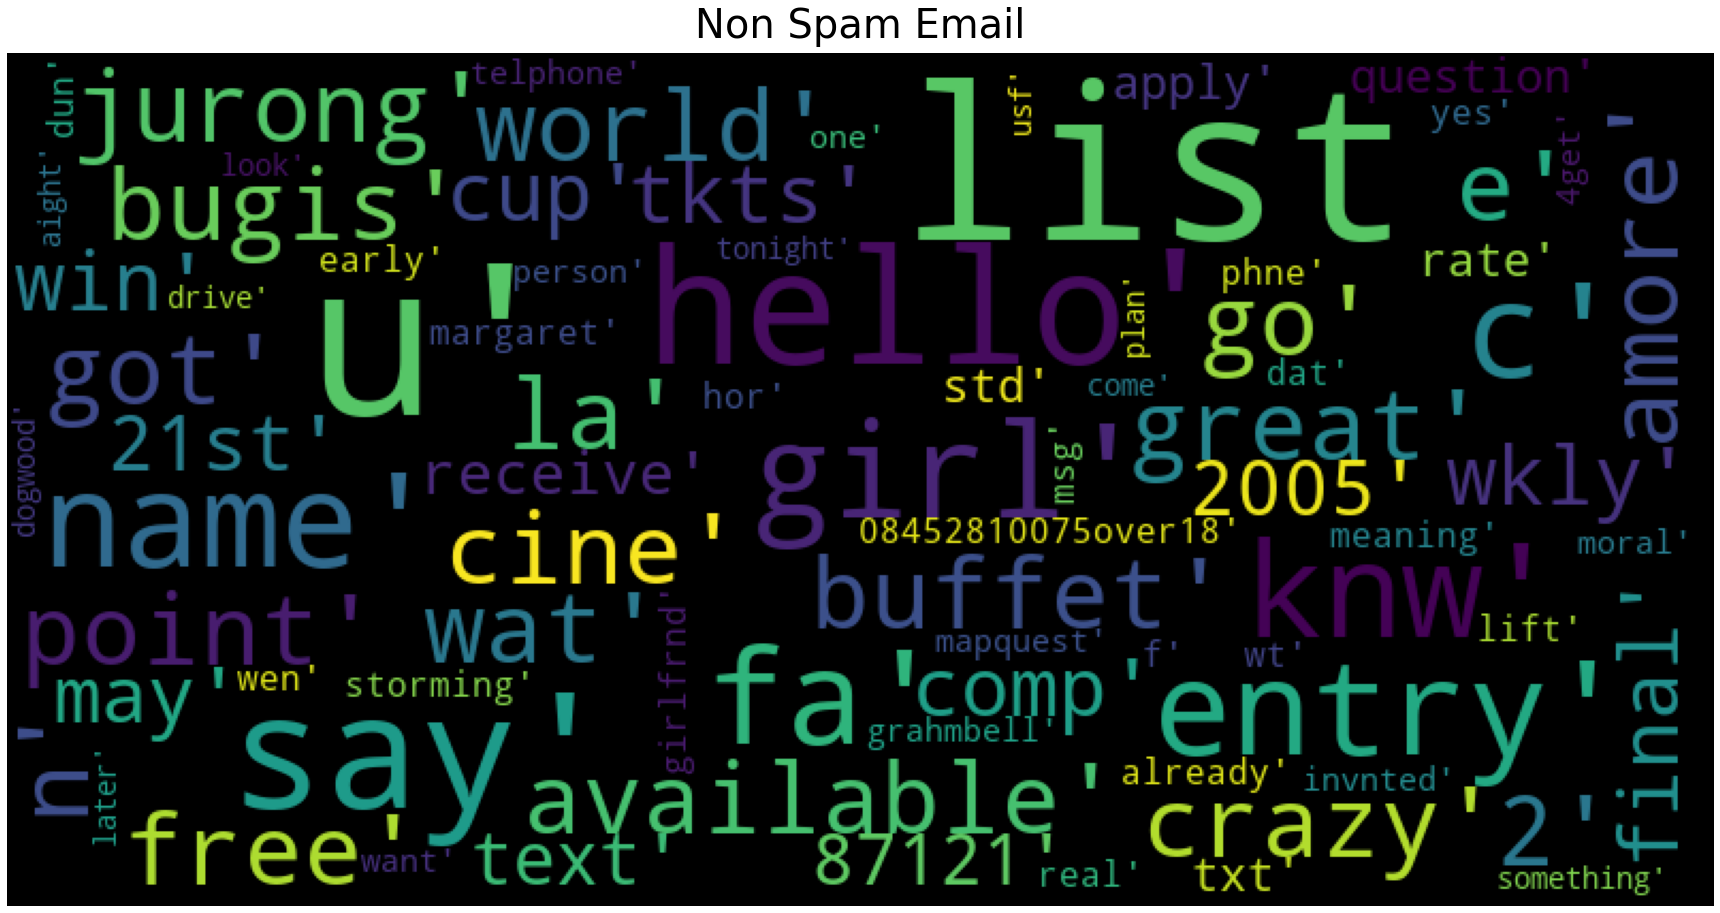

In [33]:
plot_wordcloud(non_spam_email,title="Non Spam Email")